# About Dataset

The dataset contains information about past Kickstarter projects, including features such as project category, funding goal, project launch and deadline date, project backers and historical project outcomes.

# Problem Statement

The objective of this project is to develop a machine learning model that can predict whether a Kickstarter project will be successful or not based on various project attributes and historical data.

Source of the dataset: https://www.kaggle.com/datasets/kemical/kickstarter-projects

# Data Dictionary 

Features in Original dataset--
id:         A unique identifier for each Kickstarter project.
name:       The name or title of the project.
category:   The category of the project.
sub_category: The sub-category of the project.
currency:   The currency used for the funding goal and pledges.
deadline:   The date and time by which the project needs to reach its funding goal.
goal:       The funding goal set by the project creator.
launched:   The date and time when the project was launched on Kickstarter.
pledged:    The amount pledged by backers so far.
state:      The current state of the project (successful, failed, live, etc.).
backers:    The number of backers who have supported the project.
country:    The country where the project creator is located.
usd_pledged:The amount pledged by backers converted to USD.
usd_goal:   The funding goal converted to USD.

Features Added-
days:       The difference between launch-date and deadline of project.
backer_goal:The target  usd_goal to be fulfilled by each backer.
year:       The year when the project was launched.
quarter:    The quarter of the year when the project was launched.
Major Cat:  The major category of the project.
GDP (current US$):  The Gross Domestic Product (GDP) of the country in current US dollars.
GDP per capita (current US$):  The GDP per capita of the country in current US dollars.

In [3]:
# Importing Required  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
## display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
#pd.options.display.max_rows = None

# Read Data

In [5]:
df= pd.read_csv('Capstone_Final.csv')

In [6]:
df.head(5)

,id,name,category,sub_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,days,backer_goal,year,quarter,Major Cat,GDP (currency US$),GDP per capita (currency US$)
0,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01-11-2017,30000.0,02-09-2017,2421.0,failed,15,US,2421.0,30000.0,60,2000,2017,3,"Film, Video & Theater",2.118300e+10,65840.0
1,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,21-12-2014,1000.0,01-12-2014,1205.0,successful,16,US,1205.0,1000.0,20,63,2014,4,Others,1.755300e+10,56480.0
2,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,17-03-2016,25000.0,01-02-2016,453.0,failed,40,US,453.0,25000.0,45,625,2016,1,Others,1.984300e+10,62440.0
3,1000064368,Survival Rings,Design,Design,USD,28-02-2015,2500.0,29-01-2015,664.0,failed,11,US,664.0,2500.0,30,227,2015,1,Arts & Crafts,1.863300e+10,59320.0
4,1000064918,The Beard,Comic Books,Comics,USD,08-11-2014,1500.0,09-10-2014,395.0,failed,16,US,395.0,1500.0,30,94,2014,4,Arts & Crafts,1.755300e+10,56480.0


# Understanding the Dataset

In [20]:
#Checking the dimensions of data
df.shape

(127596, 21)

In [ ]:
#We see the dataframe has 21 columns and 378661 observations.

In [21]:
# use .dtypes to view the data type of a variable
df.dtypes

id                                 int64
name                              object
category                          object
sub_category                      object
currency                          object
deadline                          object
goal                             float64
launched                          object
pledged                          float64
state                             object
backers                            int64
country                           object
usd_pledged                      float64
usd_goal                         float64
days                               int64
backer_goal                        int64
year                               int64
quarter                            int64
Major Cat                         object
GDP (currency US$)               float64
GDP per capita (currency US$)    float64
dtype: object

# Changing Data-types as required

In [22]:
#Extracting object  variable to be converted in categorical varaible
object_var = [feature for feature in df.columns if (df[feature].dtype == 'object') and (feature  not in ['deadline', 'launched'])]
object_var

['name',
 'category',
 'sub_category',
 'currency',
 'state',
 'country',
 'Major Cat']

In [23]:
# Convert necessary object variables to categorical variables
for i in object_var:
    df[i] = df[i].astype('category')

In [24]:
#Converting required column in date datatype
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

ValueError: time data "21-12-2014" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [1]:
#Converting 'year' and 'quarter' column to categorical variable
df.year = df.year.astype('category')
df.quarter = df.quarter.astype('category')

NameError: name 'df' is not defined

In [26]:
#Rechecking the datatypes
df.dtypes

id                                  int64
name                             category
category                         category
sub_category                     category
currency                         category
deadline                           object
goal                              float64
launched                           object
pledged                           float64
state                            category
backers                             int64
country                          category
usd_pledged                       float64
usd_goal                          float64
days                                int64
backer_goal                         int64
year                             category
quarter                          category
Major Cat                        category
GDP (currency US$)                float64
GDP per capita (currency US$)     float64
dtype: object

# Count of different Datatypes columns

In [27]:
categorical_count = 0
numerical_count = 0
datetime_count=0

for col in df.columns:
    if df[col].dtype == 'category':
        categorical_count += 1
    elif df[col].dtype=='datetime64[ns]':
        datetime_count+=1 
    else:
        numerical_count += 1

print("Number of categorical columns:", categorical_count)
print("Number of numerical columns:", numerical_count)
print("Number of datetime columns:", datetime_count)

Number of categorical columns: 9
Number of numerical columns: 12
Number of datetime columns: 0


# Summary Statistics

In [498]:
# describe the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,127596.0,1.073699e+09,6.192992e+08,24380.0,5.354686e+08,1.075236e+09,1.608449e+09,2.147429e+09
goal,127596.0,7.123544e+03,1.566701e+04,600.0,2.500000e+03,5.000000e+03,8.794000e+03,3.000000e+06
pledged,127596.0,3.470935e+03,6.460356e+03,150.0,1.039000e+03,2.462250e+03,5.060000e+03,1.153367e+06
backers,127596.0,5.429597e+01,5.750520e+01,1.0,1.700000e+01,3.700000e+01,7.200000e+01,1.238000e+03
usd_pledged,127596.0,3.342538e+03,2.805851e+03,250.0,1.061000e+03,2.501000e+03,5.075000e+03,1.100000e+04
usd_goal,127596.0,6.798041e+03,6.479246e+03,1000.0,2.500000e+03,5.000000e+03,8.500000e+03,3.200000e+04
days,127596.0,3.371508e+01,1.227560e+01,1.0,3.000000e+01,3.000000e+01,3.500000e+01,9.200000e+01
backer_goal,127596.0,4.271924e+02,1.112266e+03,1.0,5.000000e+01,1.020000e+02,3.492500e+02,3.131700e+04
GDP (currency US$),127596.0,1.483996e+10,5.833605e+09,68300000.0,1.509300e+10,1.660300e+10,1.863300e+10,2.118300e+10
GDP per capita (currency US$),127596.0,5.550240e+04,7.908849e+03,33504.0,5.164000e+04,5.392000e+04,5.932000e+04,1.221200e+05


In [28]:
# describe the categorical data
df.describe(include = 'category')

,name,category,sub_category,currency,state,country,year,quarter,Major Cat
count,127595,127596,127596,127596,127596,127596,127596,127596,127596
unique,127253,159,15,12,2,20,9,4,6
top,#NAME?,Product Design,Music,USD,successful,US,2014,2,Arts & Crafts
freq,13,6954,23032,106128,70833,106128,20249,34320,32148


#  Treatment of Missing Values

In [29]:
df.isnull().sum()

id                               0
name                             1
category                         0
sub_category                     0
currency                         0
deadline                         0
goal                             0
launched                         0
pledged                          0
state                            0
backers                          0
country                          0
usd_pledged                      0
usd_goal                         0
days                             0
backer_goal                      0
year                             0
quarter                          0
Major Cat                        0
GDP (currency US$)               0
GDP per capita (currency US$)    0
dtype: int64

In [30]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
# print the missing data
missing_data

,Total,Percentage of Missing Values
name,1,0.000784
id,0,0.000000
country,0,0.000000
GDP (currency US$),0,0.000000
Major Cat,0,0.000000
quarter,0,0.000000
year,0,0.000000
backer_goal,0,0.000000
days,0,0.000000
usd_goal,0,0.000000


In [31]:
df.shape

(127596, 21)

In [32]:
#Hence the rows are deleted.Crosschecking with null values
df.isnull().sum()

id                               0
name                             1
category                         0
sub_category                     0
currency                         0
deadline                         0
goal                             0
launched                         0
pledged                          0
state                            0
backers                          0
country                          0
usd_pledged                      0
usd_goal                         0
days                             0
backer_goal                      0
year                             0
quarter                          0
Major Cat                        0
GDP (currency US$)               0
GDP per capita (currency US$)    0
dtype: int64

In [33]:
df.loc[df['name'].isnull()]

,id,name,category,sub_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_goal,days,backer_goal,year,quarter,Major Cat,GDP (currency US$),GDP per capita (currency US$)
103676,634871725,NaN,Video Games,Games,GBP,06-01-2013,2000.0,19-12-2012,196.0,failed,12,GB,316.05,3224.97,18,269,2012,4,Technology & Gadgets,2.600000e+09,38000.0


In [ ]:
#Since every other values of columns seems to be appropriate -Also as name is unique for each project -Would later will dropped 

In [275]:
df.columns

Index(['id', 'name', 'category', 'sub_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_goal', 'days', 'backer_goal', 'year', 'quarter',
       'Major Cat', 'GDP (currency US$)', 'GDP per capita (currency US$)'],
      dtype='object')

In [34]:
df = df.rename(columns={"GDP (current US$)": "GDP (currency US$)", "GDP per capita (current US$)":"GDP per capita (currency US$)"})

In [35]:
df.columns

Index(['id', 'name', 'category', 'sub_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged', 'usd_goal', 'days', 'backer_goal', 'year', 'quarter',
       'Major Cat', 'GDP (currency US$)', 'GDP per capita (currency US$)'],
      dtype='object')

# Dropping redundant columns

In [36]:
unique_id = df['id'].nunique()
print(unique_id)

127596


In [37]:
unique_name = df['name'].nunique()
print(unique_name)

127253


Columns id,name- have distinct values corresponding to total data points Hence -will not contribute in building model-Can be dropped

In [38]:
df.drop(['id', 'name'], axis=1, inplace=True)

When we analyze the category and sub-category -it has almost same value. Also,we have clubbed category into main categories for better analysis.Hence,dropping-category and sub-category columns

In [39]:
df.drop(['category', 'sub_category','deadline','launched','goal','pledged','GDP (currency US$)'], axis=1, inplace=True)

# Analysis of Column-Main Category

In [40]:
# Get the total count of each main category
main_category_count = df['Major Cat'].value_counts()

# Get the percentage of each main category
main_category_percentage = df['Major Cat'].value_counts(normalize=True) * 100

# Create a new DataFrame to store the results
main_category_summary = pd.DataFrame({
    'Total Count': main_category_count,
    'Percentage (%)': main_category_percentage
})
print(main_category_summary)

                         Total Count  Percentage (%)
Major Cat                                           
Arts & Crafts                  32148       25.195147
Film, Video & Theater          27281       21.380764
Music & Performance            23602       18.497445
Others                         18927       14.833537
Publishing & Literature        16414       12.864040
Technology & Gadgets            9224        7.229067


In [ ]:
#Checking percentage of each Main category-if they are evenly distributed-as it is added 

As the ('Food & Beverage', 'Gaming & Entertainment', 'Miscellaneous','Community & Civic Projects', 'Fashion & Apparel') columns have less percent-contribution-we will merge them under single category named'Others'

In [41]:
# Dictionary to map specific categories to 'Others'
categories_to_others = {
    'Food & Beverage': 'Others',
    'Gaming & Entertainment': 'Others',
    'Miscellaneous': 'Others',
    'Community & Civic Projects': 'Others',
    'Fashion & Apparel': 'Others'
}
# Replace specific categories with 'Others' in the 'Major Cat' column of DataFrame 'df'
df['Major Cat'] = df['Major Cat'].replace(categories_to_others)


In [42]:
# Get the total count of each main category
main_category_count = df['Major Cat'].value_counts()

# Get the percentage of each main category
main_category_percentage = df['Major Cat'].value_counts(normalize=True) * 100

# Create a new DataFrame to store the results
main_category_summary = pd.DataFrame({
    'Total Count': main_category_count,
    'Percentage (%)': main_category_percentage
})
print(main_category_summary)

                         Total Count  Percentage (%)
Major Cat                                           
Arts & Crafts                  32148       25.195147
Film, Video & Theater          27281       21.380764
Music & Performance            23602       18.497445
Others                         18927       14.833537
Publishing & Literature        16414       12.864040
Technology & Gadgets            9224        7.229067


# Analysis and Treatment of Target Variable

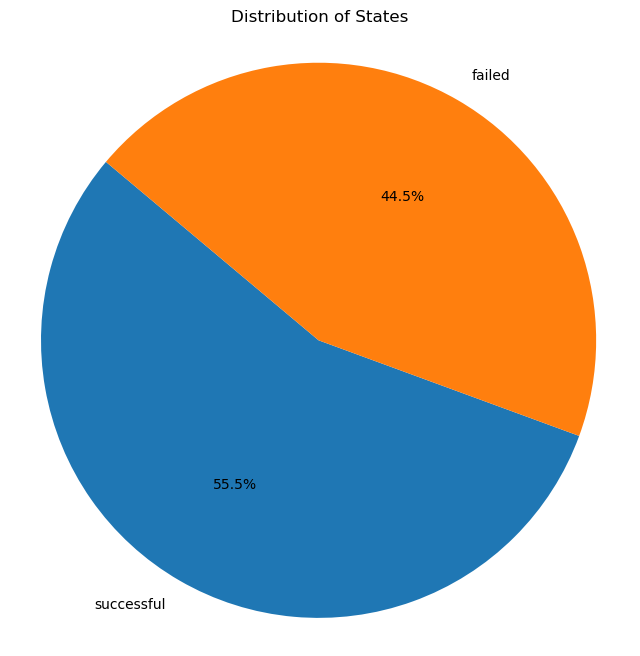

In [43]:
state_counts = df['state'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [44]:
state_counts = df['state'].value_counts()
print(state_counts)

state
successful    70833
failed        56763
Name: count, dtype: int64


Since-the states canceled,live,suspended,undefined(treated earlier) have comaritively less counts.
We will drop it-As Not enough data is to analyse these states-

In [45]:
# Drop rows where 'state' is neither 'failed' nor 'successful'
df.drop(df[~df['state'].isin(['failed', 'successful'])].index, inplace=True)

In [46]:
state_counts = df['state'].value_counts()
print(state_counts)

state
successful    70833
failed        56763
Name: count, dtype: int64


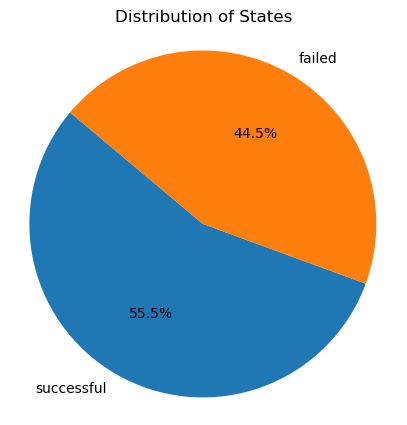

In [47]:
state_counts = df['state'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Treatment of Outliers

In [48]:
df_numeric_features=df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['backers', 'usd_pledged', 'usd_goal', 'days', 'backer_goal',
       'GDP per capita (currency US$)'],
      dtype='object')

In [49]:
df.columns

Index(['currency', 'state', 'backers', 'country', 'usd_pledged', 'usd_goal',
       'days', 'backer_goal', 'year', 'quarter', 'Major Cat',
       'GDP per capita (currency US$)'],
      dtype='object')

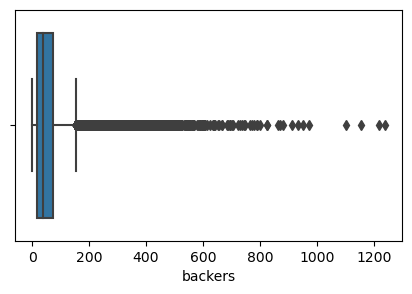

********************************************


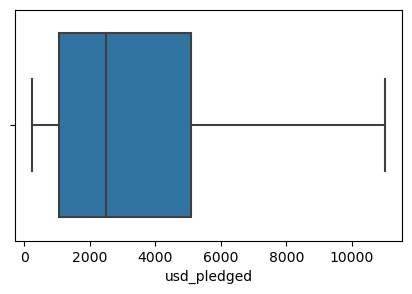

********************************************


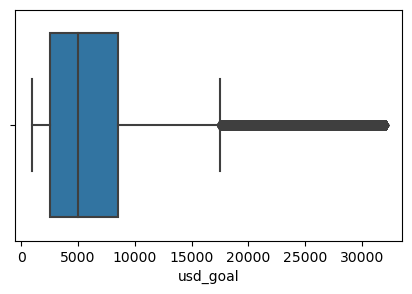

********************************************


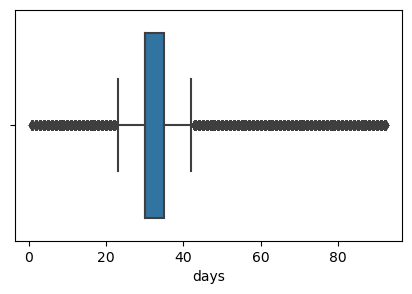

********************************************


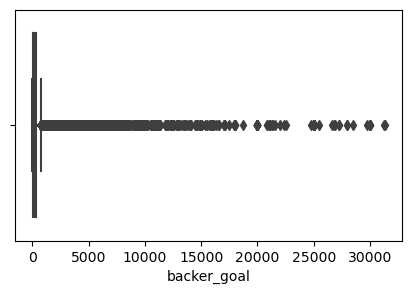

********************************************


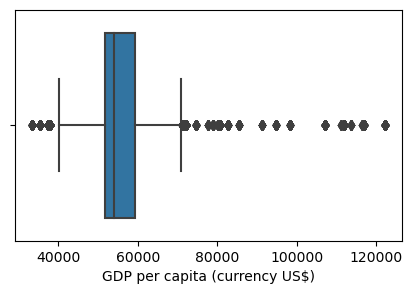

********************************************


In [50]:
for var in df_numeric_features.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)


In [51]:
# Define the percentiles for Winsorization (5th and 95th percentiles in this case)
lower_percentile = 5
upper_percentile = 95

# Calculate the threshold values for Winsorization
lower_threshold = np.percentile(df['backers'], lower_percentile)
upper_threshold = np.percentile(df['backers'], upper_percentile)

# Apply Winsorization
df['backers_winsorized'] = df['backers'].clip(lower_threshold, upper_threshold)

<AxesSubplot:xlabel='backers_winsorized'>

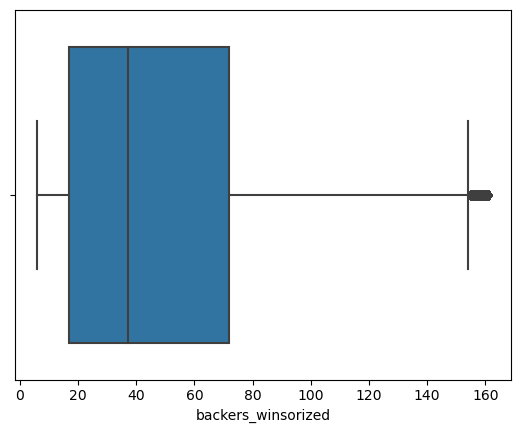

In [520]:
sns.boxplot(df['backers_winsorized'])

#Treatment of usd_goal by IQR method

In [52]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['usd_goal'].quantile(0.25)
Q3 = df['usd_goal'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the nearest non-outlying values within the bounds
df['usd_goal_iqr'] = df['usd_goal'].clip(lower_bound, upper_bound)

<AxesSubplot:xlabel='usd_goal_iqr'>

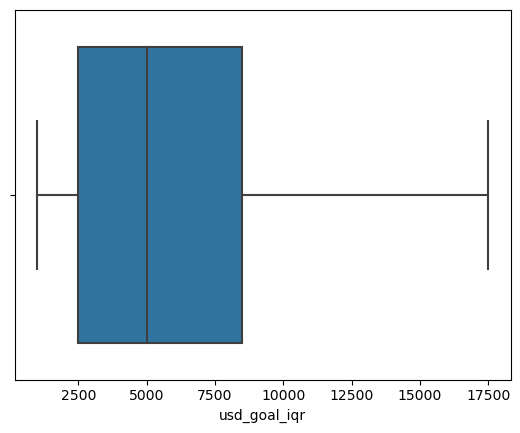

In [53]:
sns.boxplot(df['usd_goal_iqr'])

#Treatment of usd_pledged by IQR method

In [54]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['usd_pledged'].quantile(0.25)
Q3 = df['usd_pledged'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the nearest non-outlying values within the bounds
df['usd_pledged_iqr'] = df['usd_pledged'].clip(lower_bound, upper_bound)

<AxesSubplot:xlabel='usd_pledged_iqr'>

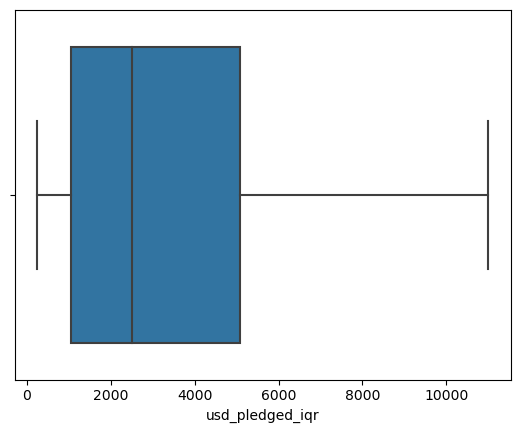

In [55]:
sns.boxplot(df['usd_pledged_iqr'])

Treatment of days-columns by IQR

In [56]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['days'].quantile(0.25)
Q3 = df['days'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the nearest non-outlying values within the bounds
df['days_iqr'] = df['days'].clip(lower_bound, upper_bound)

<AxesSubplot:xlabel='days_iqr'>

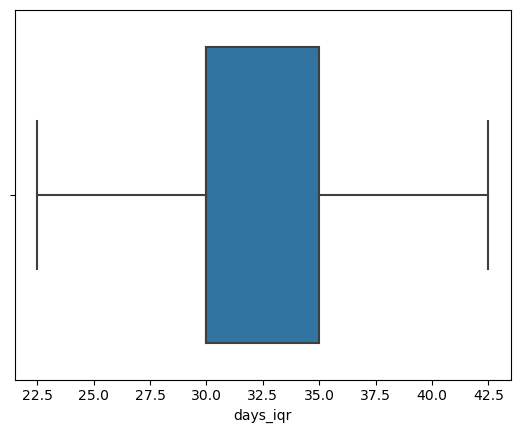

In [57]:
sns.boxplot(df['days_iqr'])

Treatment of backer_goal by IQR

In [58]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['backer_goal'].quantile(0.25)
Q3 = df['backer_goal'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace the outlier values with the nearest non-outlying values within the bounds
df['backer_goal_iqr'] = df['backer_goal'].clip(lower_bound, upper_bound)

<AxesSubplot:xlabel='backer_goal_iqr'>

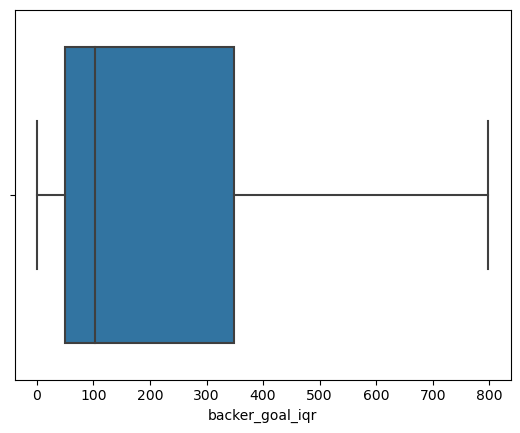

In [59]:
sns.boxplot(df['backer_goal_iqr'])

Analysis of GDP features

In [60]:
df['GDP per capita (currency US$)'].skew()

2.3398040552092407

In [61]:
df.head()

,currency,state,backers,country,usd_pledged,usd_goal,days,backer_goal,year,quarter,Major Cat,GDP per capita (currency US$),backers_winsorized,usd_goal_iqr,usd_pledged_iqr,days_iqr,backer_goal_iqr
0,USD,failed,15,US,2421.0,30000.0,60,2000,2017,3,"Film, Video & Theater",65840.0,15,17500.0,2421.0,42.5,798.125
1,USD,successful,16,US,1205.0,1000.0,20,63,2014,4,Others,56480.0,16,1000.0,1205.0,22.5,63.000
2,USD,failed,40,US,453.0,25000.0,45,625,2016,1,Others,62440.0,40,17500.0,453.0,42.5,625.000
3,USD,failed,11,US,664.0,2500.0,30,227,2015,1,Arts & Crafts,59320.0,11,2500.0,664.0,30.0,227.000
4,USD,failed,16,US,395.0,1500.0,30,94,2014,4,Arts & Crafts,56480.0,16,1500.0,395.0,30.0,94.000


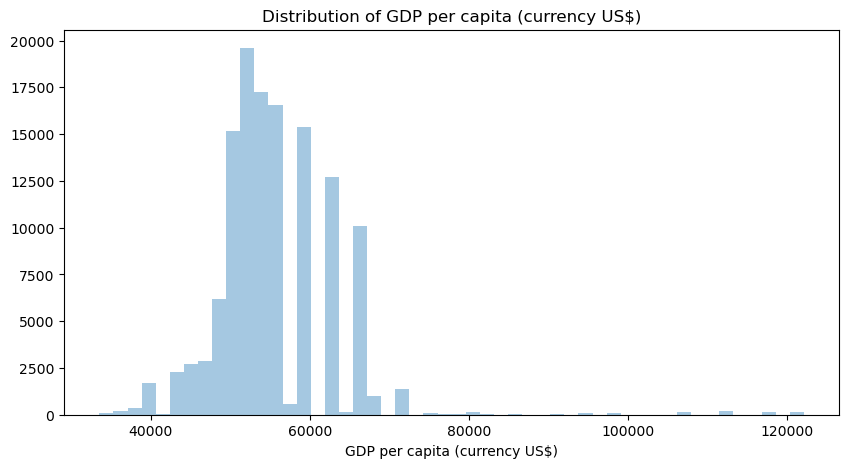

In [62]:
# Set the figure size
plt.figure(figsize=(10,5 ))
sns.distplot(df['GDP per capita (currency US$)'], kde=False)
plt.title('Distribution of GDP per capita (currency US$)')
# Show the plot
plt.show()

As there are 20 different countries present in our dataset-for each of which the GDP varies greatly-hence not treating outliers

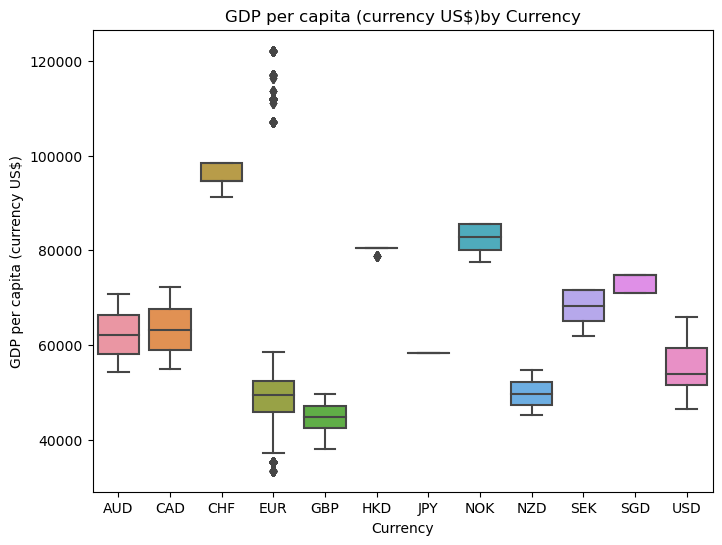

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='currency', y='GDP per capita (currency US$)', data=df)
plt.title('GDP per capita (currency US$)by Currency')
plt.xlabel('Currency')
plt.ylabel('GDP per capita (currency US$)')
plt.show()

# Multi-collinearity

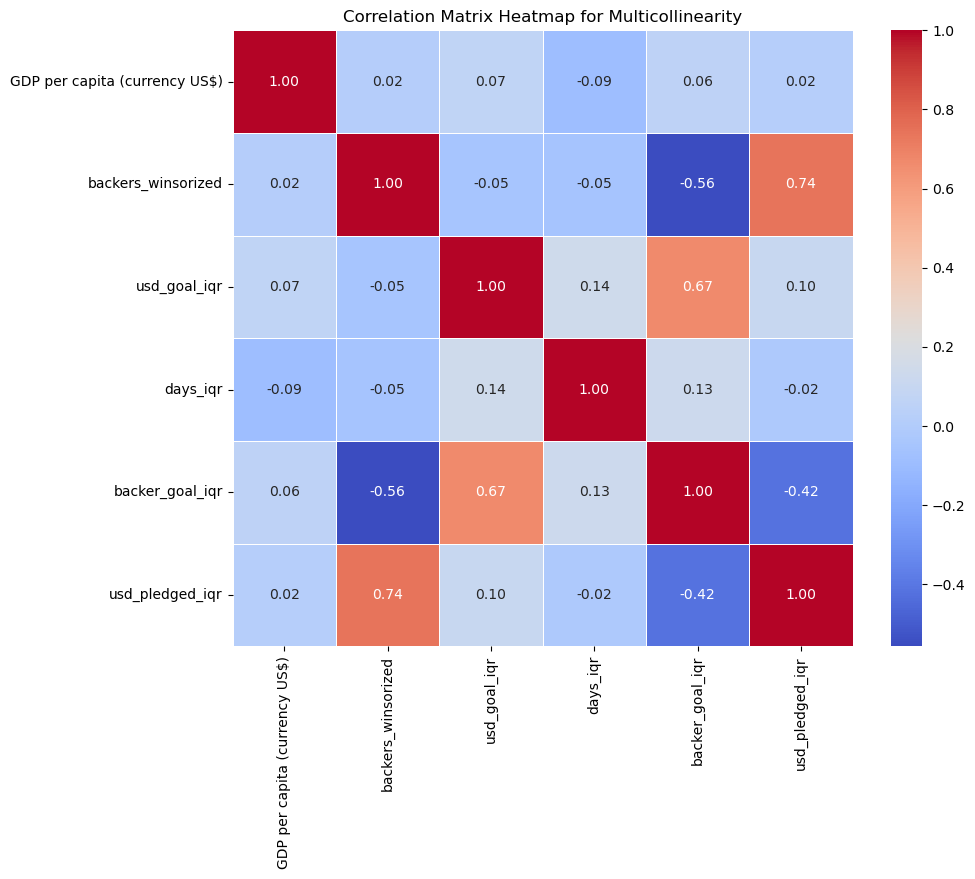

In [64]:
columns_for_analysis = ['GDP per capita (currency US$)', 'backers_winsorized', 'usd_goal_iqr', 'days_iqr', 'backer_goal_iqr', 'usd_pledged_iqr']
correlation_matrix = df[columns_for_analysis].corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Multicollinearity')
plt.show()

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Add a constant column to the DataFrame (required for statsmodels)
df['constant'] = 1

# Select the specific columns for VIF calculation
columns_for_vif = ['GDP per capita (currency US$)', 'backers_winsorized', 'usd_goal_iqr', 'days_iqr', 'backer_goal_iqr','usd_pledged_iqr']

# Calculate VIF for the selected columns
vif_data = pd.DataFrame()
vif_data['Variable'] = columns_for_vif
vif_data['VIF'] = [variance_inflation_factor(df[columns_for_vif].values, i) for i in range(len(columns_for_vif))]

print(vif_data)

                        Variable        VIF
0  GDP per capita (currency US$)  18.753015
1             backers_winsorized   6.507714
2                   usd_goal_iqr   7.275609
3                       days_iqr  17.512746
4                backer_goal_iqr   7.028067
5                usd_pledged_iqr   6.036083


In [ ]:
#Ignoring  the days_iqr-columns--As it has high collinearity

In [67]:
# Add a constant column to the DataFrame (required for statsmodels)
df['constant'] = 1

# Select the specific columns for VIF calculation
columns_for_vif = ['GDP per capita (currency US$)', 'backers_winsorized', 'usd_goal_iqr', 'backer_goal_iqr','usd_pledged_iqr']

# Calculate VIF for the selected columns
vif_data = pd.DataFrame()
vif_data['Variable'] = columns_for_vif
vif_data['VIF'] = [variance_inflation_factor(df[columns_for_vif].values, i) for i in range(len(columns_for_vif))]

print(vif_data)

                        Variable       VIF
0  GDP per capita (currency US$)  5.948292
1             backers_winsorized  6.471692
2                   usd_goal_iqr  7.273496
3                backer_goal_iqr  6.931881
4                usd_pledged_iqr  6.021308


# Univariate analysis

Analysis of Currency Column

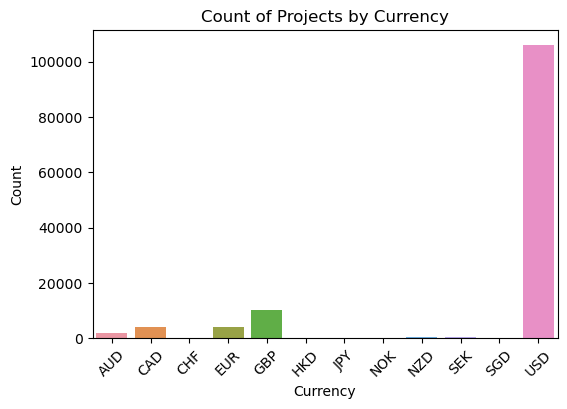

In [68]:
# Plot a count plot for the 'currency' column
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='currency')
plt.title('Count of Projects by Currency')
plt.xlabel('Currency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Analysis of State-column

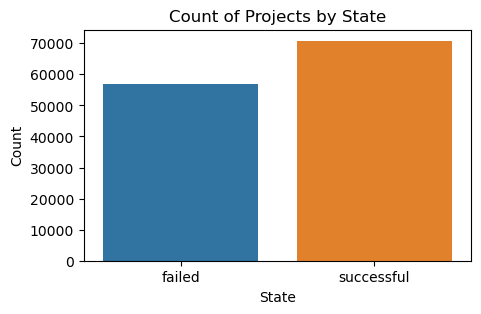

In [69]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='state')
plt.title('Count of Projects by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

Analysis of Country

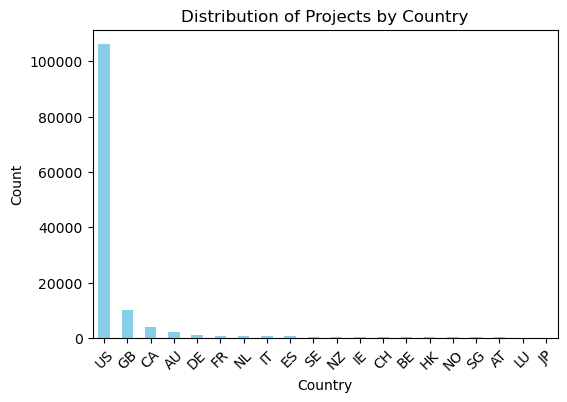

In [70]:
plt.figure(figsize=(6, 4))
df['country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Projects by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of Quarter

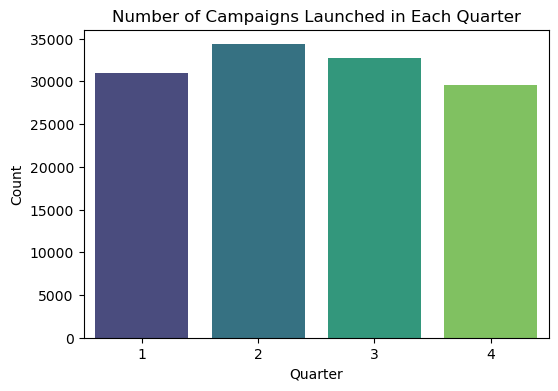

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(x='quarter', data=df, palette='viridis')
plt.title('Number of Campaigns Launched in Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

Analysis of Major-Category

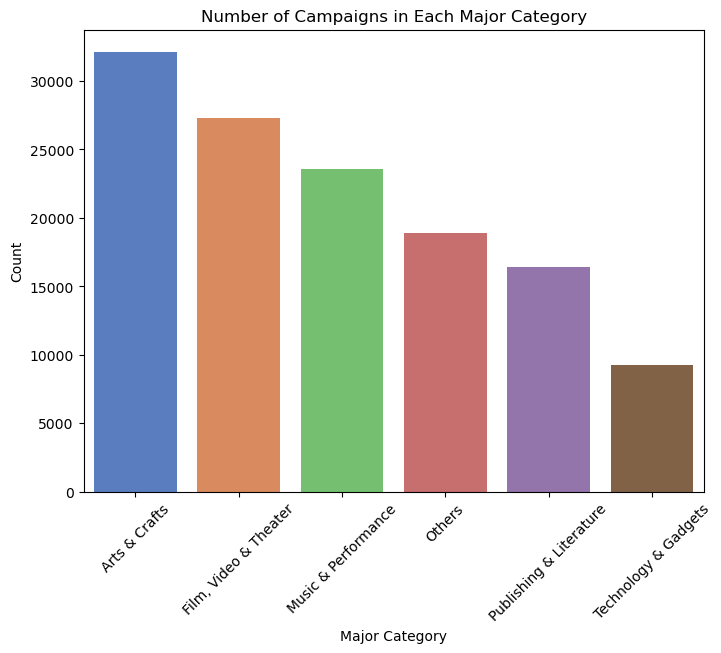

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Major Cat', data=df, palette='muted')
plt.title('Number of Campaigns in Each Major Category')
plt.xlabel('Major Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Analysis of GDP per capita (currency US$)

In [73]:
df.head()

,currency,state,backers,country,usd_pledged,usd_goal,days,backer_goal,year,quarter,Major Cat,GDP per capita (currency US$),backers_winsorized,usd_goal_iqr,usd_pledged_iqr,days_iqr,backer_goal_iqr,constant
0,USD,failed,15,US,2421.0,30000.0,60,2000,2017,3,"Film, Video & Theater",65840.0,15,17500.0,2421.0,42.5,798.125,1
1,USD,successful,16,US,1205.0,1000.0,20,63,2014,4,Others,56480.0,16,1000.0,1205.0,22.5,63.000,1
2,USD,failed,40,US,453.0,25000.0,45,625,2016,1,Others,62440.0,40,17500.0,453.0,42.5,625.000,1
3,USD,failed,11,US,664.0,2500.0,30,227,2015,1,Arts & Crafts,59320.0,11,2500.0,664.0,30.0,227.000,1
4,USD,failed,16,US,395.0,1500.0,30,94,2014,4,Arts & Crafts,56480.0,16,1500.0,395.0,30.0,94.000,1


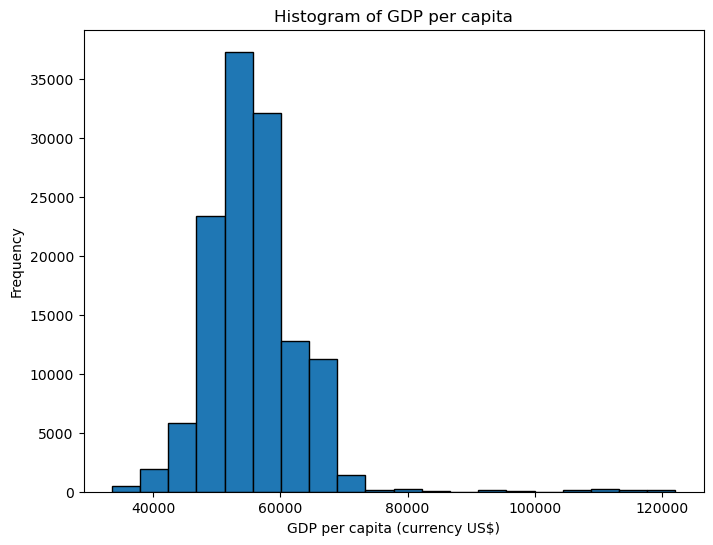

In [74]:
import matplotlib.pyplot as plt

# Plot histogram of GDP per capita column
plt.figure(figsize=(8, 6))
plt.hist(df['GDP per capita (currency US$)'], bins=20, edgecolor='black')
plt.xlabel('GDP per capita (currency US$)')
plt.ylabel('Frequency')
plt.title('Histogram of GDP per capita')
plt.show()

Analysis of Usd_goal

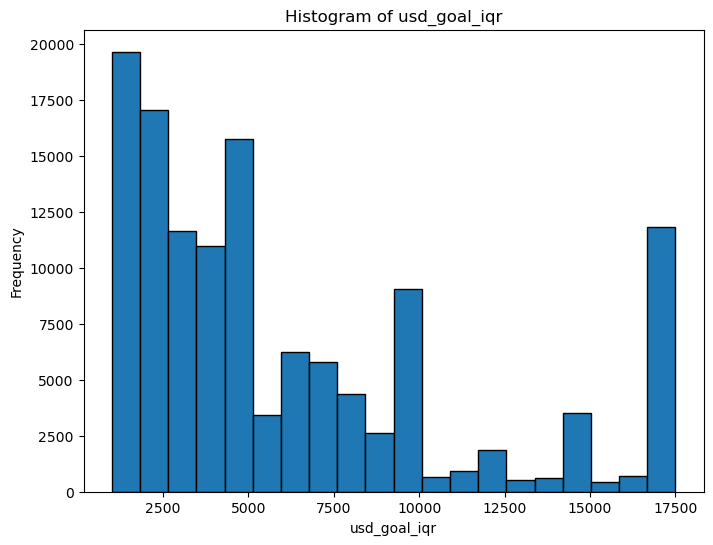

In [75]:
plt.figure(figsize=(8, 6))
plt.hist(df['usd_goal_iqr'], bins=20, edgecolor='black')
plt.xlabel('usd_goal_iqr')
plt.ylabel('Frequency')
plt.title('Histogram of usd_goal_iqr')
plt.show()

Analysis of Usd_pledged

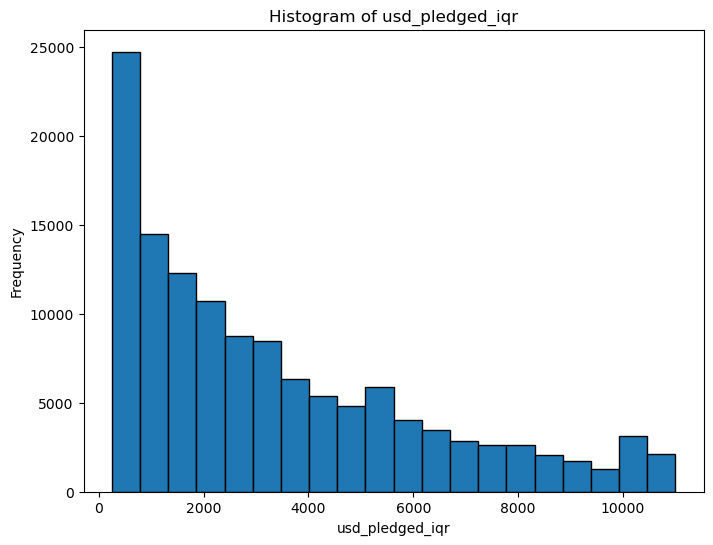

In [76]:
plt.figure(figsize=(8, 6))
plt.hist(df['usd_pledged_iqr'], bins=20, edgecolor='black')
plt.xlabel('usd_pledged_iqr')
plt.ylabel('Frequency')
plt.title('Histogram of usd_pledged_iqr')
plt.show()

Analysis of Backers-column

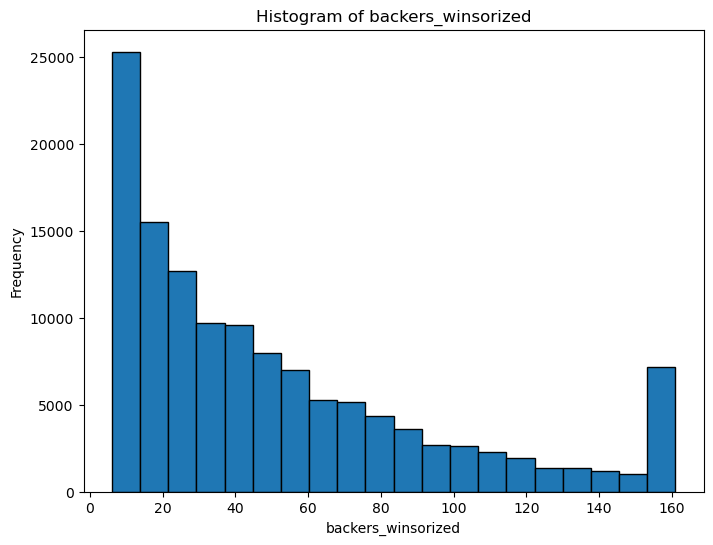

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(df['backers_winsorized'], bins=20, edgecolor='black')
plt.xlabel('backers_winsorized')
plt.ylabel('Frequency')
plt.title('Histogram of backers_winsorized')
plt.show()

Analysis of Days

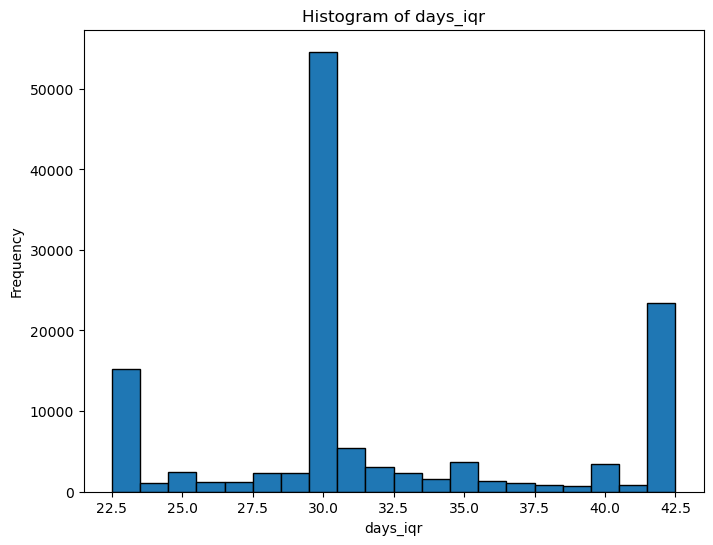

In [78]:
plt.figure(figsize=(8, 6))
plt.hist(df['days_iqr'], bins=20, edgecolor='black')
plt.xlabel('days_iqr')
plt.ylabel('Frequency')
plt.title('Histogram of days_iqr')
plt.show()

# Bivariate analysis Between Target and Dependent Variables

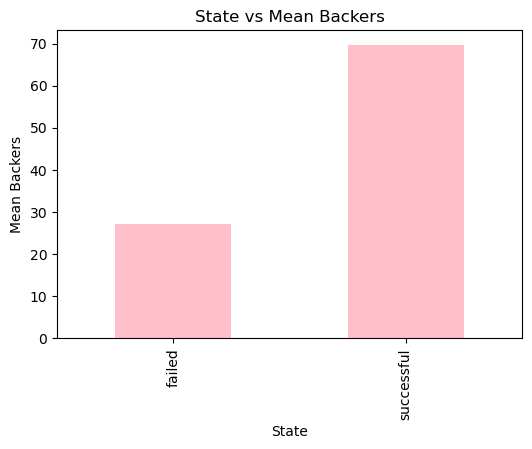

In [79]:
backers_mean_by_state = df.groupby('state')['backers_winsorized'].mean()

# Plot a bar chart to visualize the mean number of backers for each state
backers_mean_by_state.plot(kind='bar', color='pink', figsize=(6, 4))
plt.title('State vs Mean Backers')
plt.xlabel('State')
plt.ylabel('Mean Backers')
plt.show()

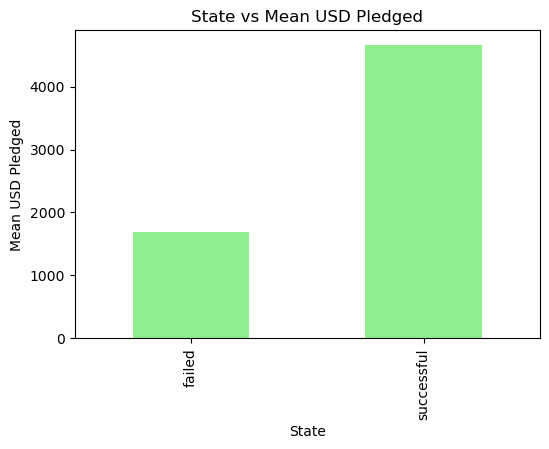

In [80]:
usd_pledged_mean_by_state = df.groupby('state')['usd_pledged_iqr'].mean()

# Plot a bar chart to visualize the mean USD pledged for each state
usd_pledged_mean_by_state.plot(kind='bar', color='lightgreen', figsize=(6, 4))
plt.title('State vs Mean USD Pledged')
plt.xlabel('State')
plt.ylabel('Mean USD Pledged')
plt.show()

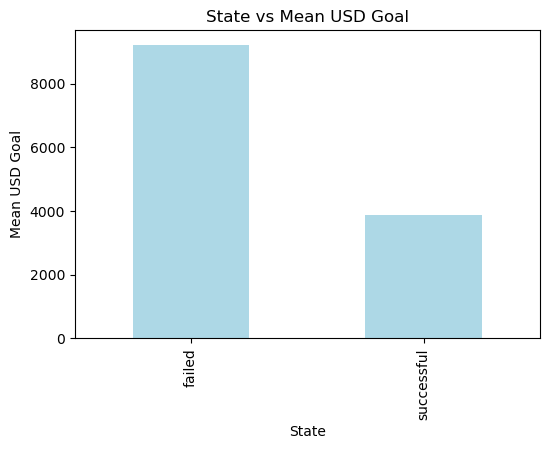

In [81]:
usd_goal_mean_by_state = df.groupby('state')['usd_goal_iqr'].mean()

# Plot a bar chart to visualize the mean USD goal for each state
usd_goal_mean_by_state.plot(kind='bar', color='lightblue', figsize=(6, 4))
plt.title('State vs Mean USD Goal')
plt.xlabel('State')
plt.ylabel('Mean USD Goal')
plt.show()

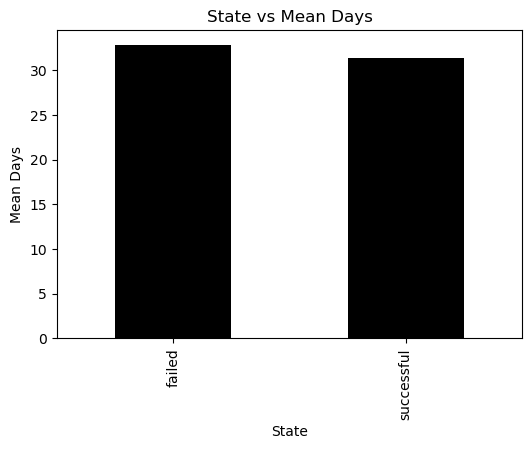

In [82]:
days_mean_by_state = df.groupby('state')['days_iqr'].mean()

# Plot a bar chart to visualize the mean days for each state
days_mean_by_state.plot(kind='bar', color='black', figsize=(6, 4))
plt.title('State vs Mean Days')
plt.xlabel('State')
plt.ylabel('Mean Days')
plt.show()

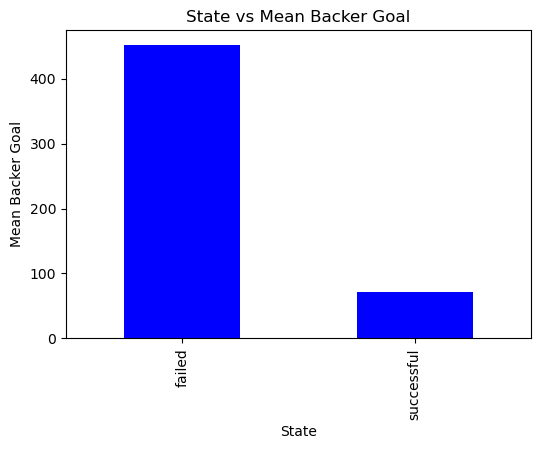

In [83]:
backer_goal_mean_by_state = df.groupby('state')['backer_goal_iqr'].mean()

# Plot a bar chart to visualize the mean backer_goal for each state
backer_goal_mean_by_state.plot(kind='bar', color='blue', figsize=(6, 4))
plt.title('State vs Mean Backer Goal')
plt.xlabel('State')
plt.ylabel('Mean Backer Goal')
plt.show()

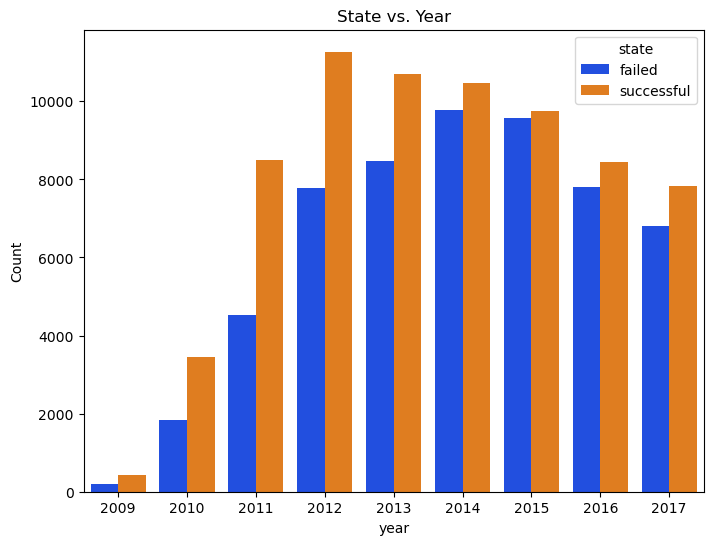

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='year', hue='state', palette='bright')
plt.title('State vs. Year')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

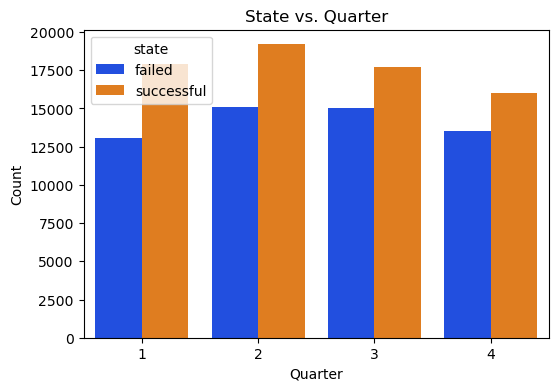

In [85]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='quarter', hue='state', palette='bright')
plt.title('State vs. Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

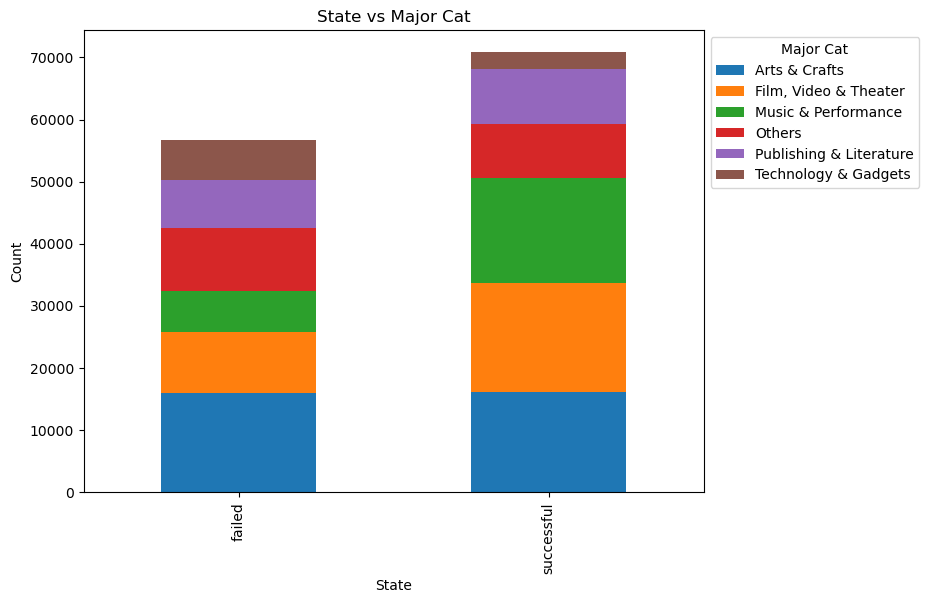

In [86]:
state_vs_major_cat_crosstab = pd.crosstab(df['state'], df['Major Cat'])

# Plot a stacked bar chart to visualize the distribution of states across different major categories
state_vs_major_cat_crosstab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('State vs Major Cat')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Major Cat', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

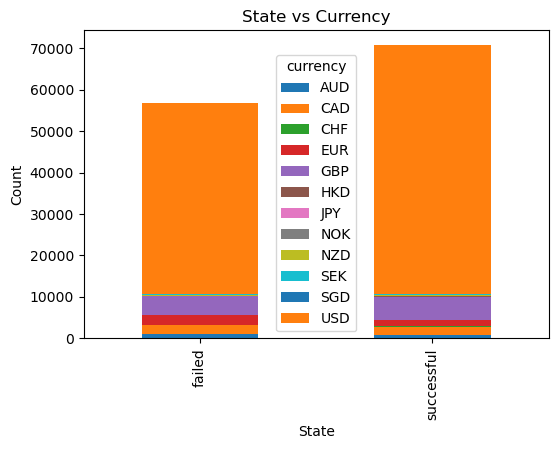

In [87]:
cross_tab = pd.crosstab(df['state'], df['currency'])

# Plot a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('State vs Currency')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

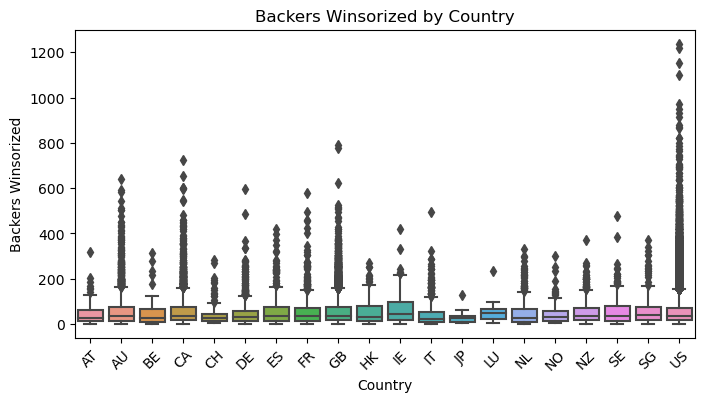

In [88]:
# Create the box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='country', y='backers', data=df)
plt.title('Backers Winsorized by Country')
plt.xlabel('Country')
plt.ylabel('Backers Winsorized')
plt.xticks(rotation=45)
plt.show()

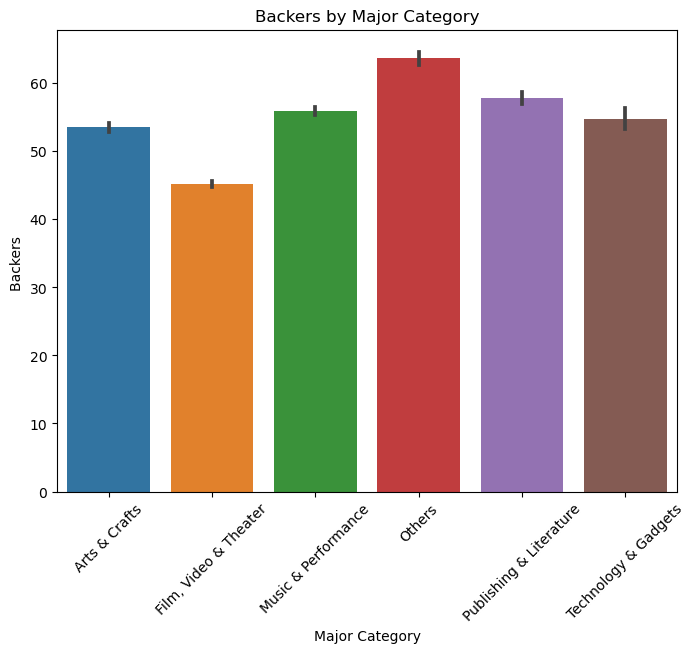

In [89]:
# Create the grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Major Cat', y='backers', data=df)
plt.title('Backers by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Backers ')
plt.xticks(rotation=45)
plt.show()

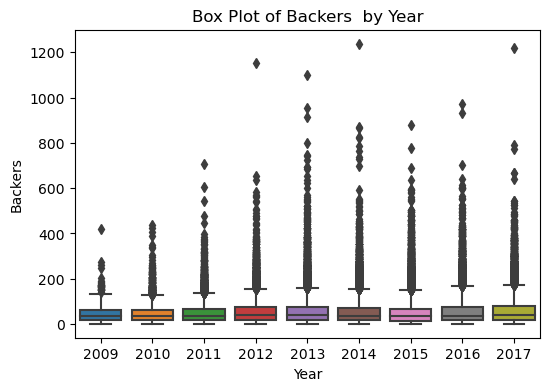

In [90]:
# Create a box plot to visualize the distribution of backers_winsorized for each year
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='year', y='backers')
plt.title('Box Plot of Backers  by Year')
plt.xlabel('Year')
plt.ylabel('Backers')
plt.show()

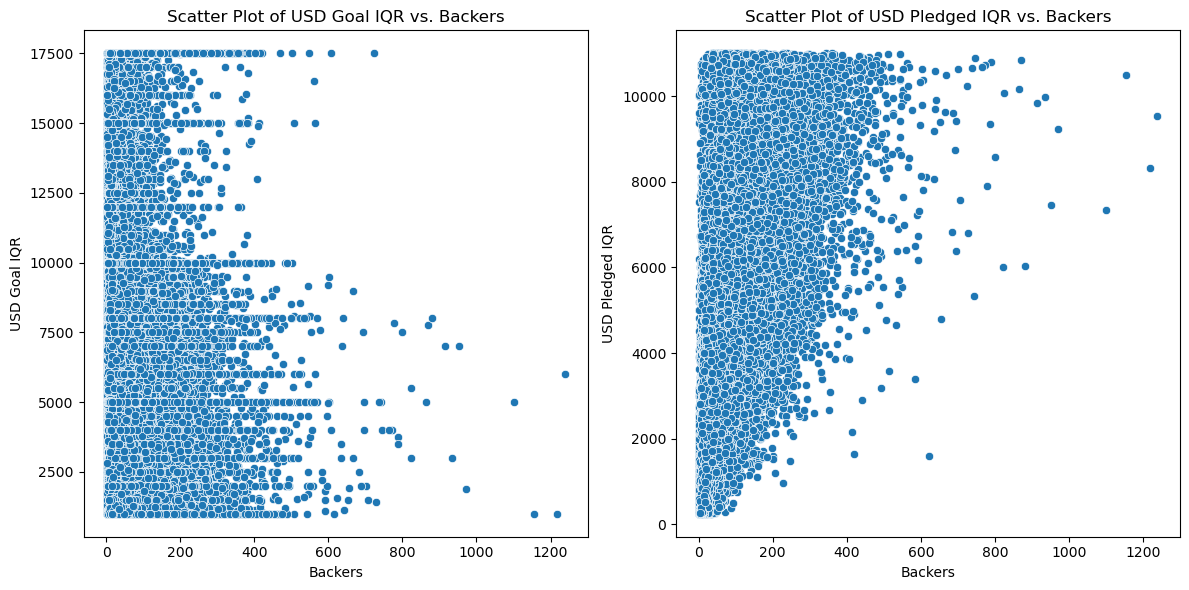

In [91]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for 'usd_goal_iqr' vs. 'backers'
sns.scatterplot(data=df, x='backers', y='usd_goal_iqr', ax=axes[0])
axes[0].set_title('Scatter Plot of USD Goal IQR vs. Backers')
axes[0].set_xlabel('Backers')
axes[0].set_ylabel('USD Goal IQR')

# Scatter plot for 'usd_pledged_iqr' vs. 'backers'
sns.scatterplot(data=df, x='backers', y='usd_pledged_iqr', ax=axes[1])
axes[1].set_title('Scatter Plot of USD Pledged IQR vs. Backers')
axes[1].set_xlabel('Backers')
axes[1].set_ylabel('USD Pledged IQR')

plt.tight_layout()  # To avoid overlapping of plot elements
plt.show()

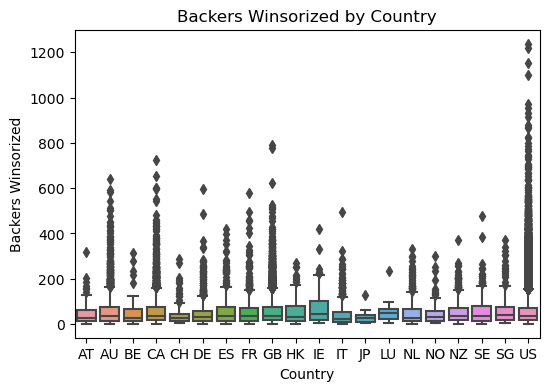

In [92]:
# Create box plot for backers_winsorized vs. country
plt.figure(figsize=(6, 4))
sns.boxplot(x='country', y='backers', data=df)
plt.title('Backers Winsorized by Country')
plt.xlabel('Country')
plt.ylabel('Backers Winsorized')
plt.show()

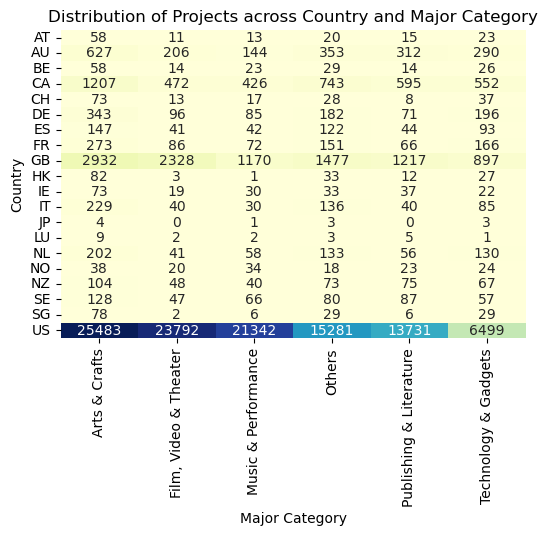

In [93]:
# Create a contingency table for country and major_cat
contingency_table = pd.crosstab(df['country'], df['Major Cat'])

# Create a stacked bar chart
plt.figure(figsize=(6, 4))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title('Distribution of Projects across Country and Major Category')
plt.xlabel('Major Category')
plt.ylabel('Country')
plt.show()

In [94]:
df.dtypes

currency                         category
state                            category
backers                             int64
country                          category
usd_pledged                       float64
usd_goal                          float64
days                                int64
backer_goal                         int64
year                             category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
backers_winsorized                  int64
usd_goal_iqr                      float64
usd_pledged_iqr                   float64
days_iqr                          float64
backer_goal_iqr                   float64
constant                            int64
dtype: object

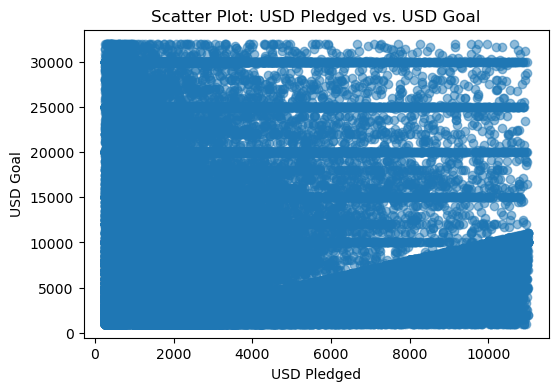

In [95]:
# Create a scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(df['usd_pledged'], df['usd_goal'], alpha=0.5)
plt.title('Scatter Plot: USD Pledged vs. USD Goal')
plt.xlabel('USD Pledged')
plt.ylabel('USD Goal')
plt.show()

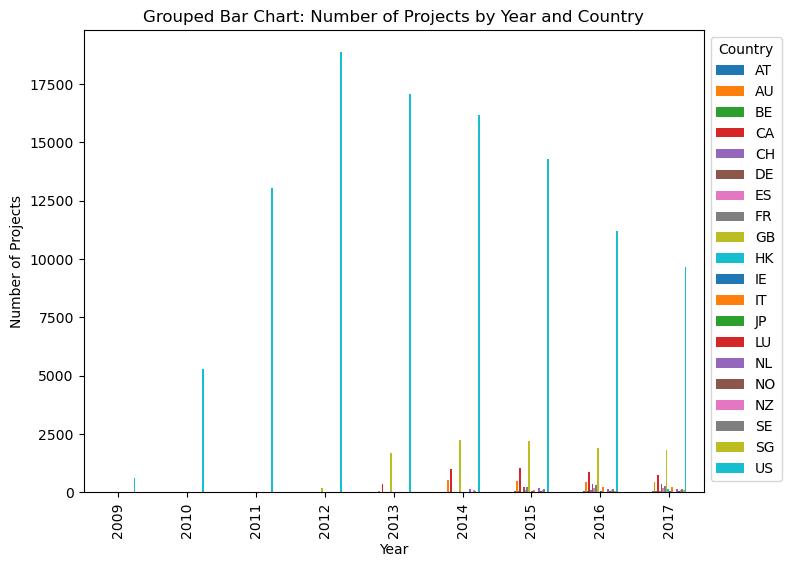

In [96]:
# Group the data by 'year' and 'country' and count the number of projects in each group
grouped_data = df.groupby(['year', 'country']).size().reset_index(name='count')

# Pivot the data to create a grouped bar chart
pivot_data = grouped_data.pivot(index='year', columns='country', values='count')

# Create the grouped bar chart
pivot_data.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Chart: Number of Projects by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

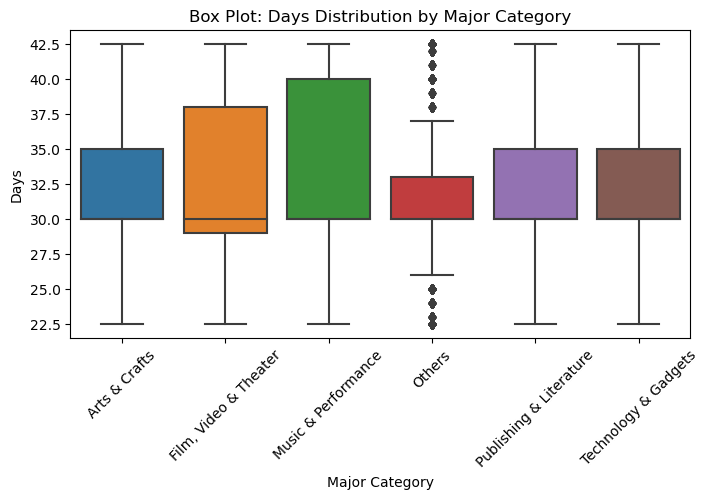

In [97]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Major Cat', y='days_iqr', data=df)
plt.title('Box Plot: Days Distribution by Major Category')
plt.xlabel('Major Category')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#HeatMaps to get an clear understanding of categorical features

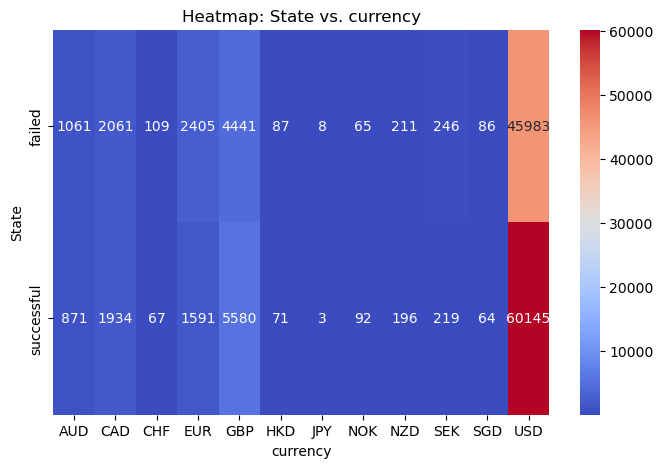

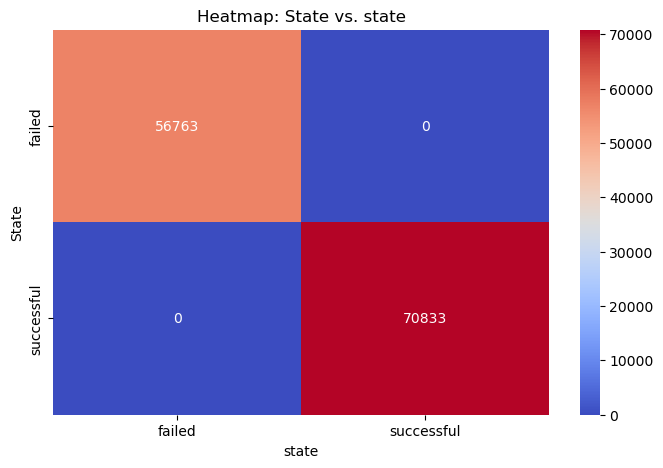

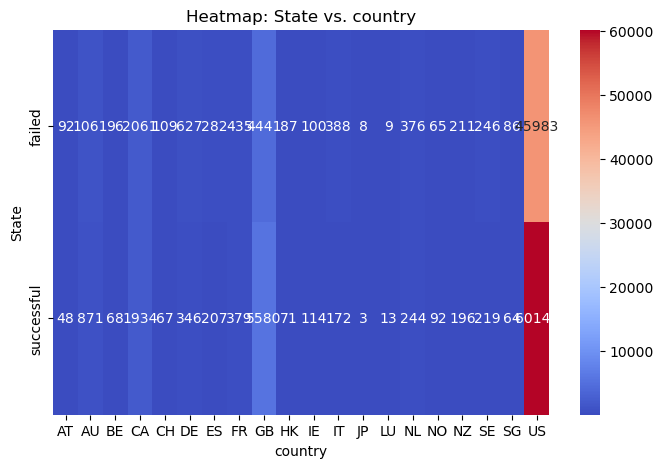

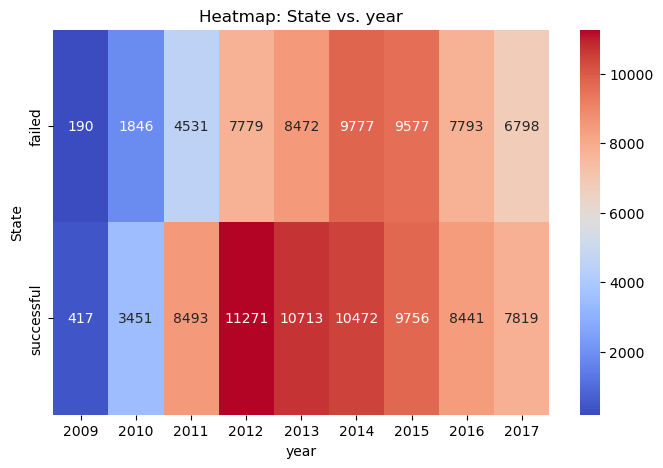

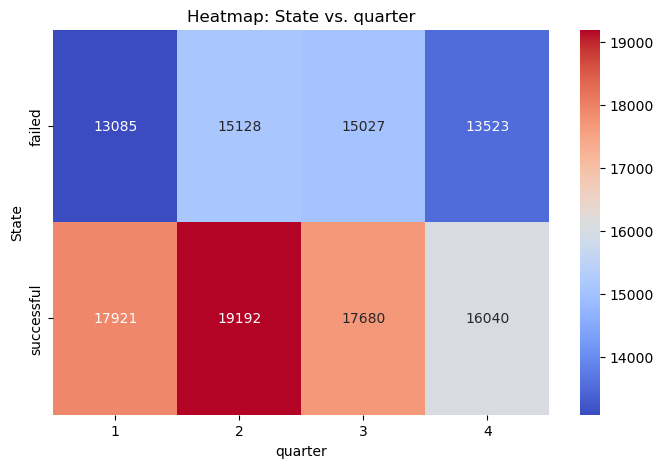

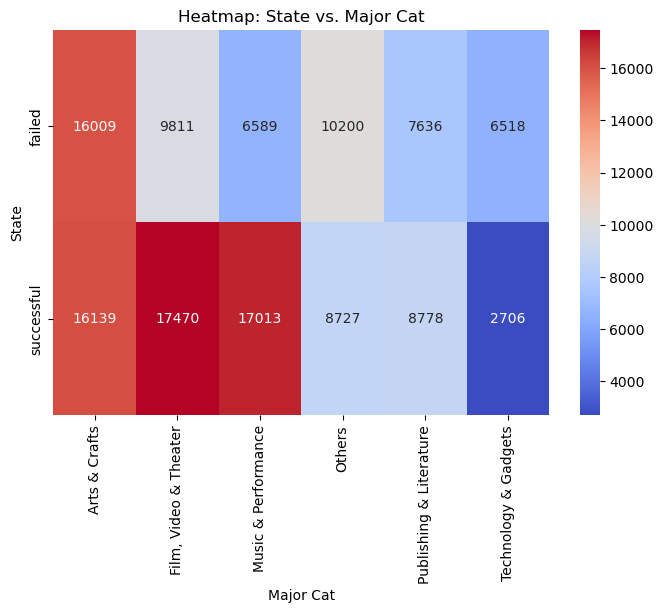

In [98]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns.tolist()

# Create a separate heatmap for each categorical column
for cat_col in categorical_columns:
    # Create a crosstabulation of state vs. the current categorical column
    crosstab_data = pd.crosstab(df['state'], df[cat_col])
    
    # Create the heatmap
    plt.figure(figsize=(8, 5))
    sns.heatmap(crosstab_data, cmap='coolwarm', annot=True, fmt='d', cbar=True)
    plt.title(f'Heatmap: State vs. {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('State')
    plt.show()

In [ ]:
#Just to Analyze state by months and years-we made use of alternative dataset

# Transformations on required columns

Transformation of usd_goal_iqr by boxcox

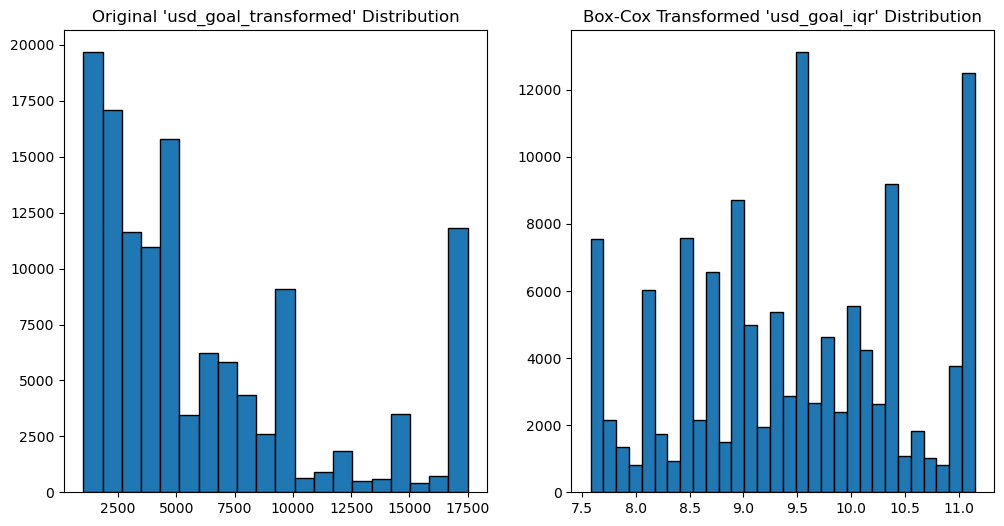

In [99]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Perform the Box-Cox transformation
df['usd_goal_Box-Cox'], lambda_usd_goal_iqr = boxcox(df['usd_goal_iqr'] + 1)  # Adding 1 to avoid non-positive values

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['usd_goal_iqr'], bins=20, edgecolor='k')
plt.title("Original 'usd_goal_transformed' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['usd_goal_Box-Cox'], bins=30, edgecolor='k')
plt.title("Box-Cox Transformed 'usd_goal_iqr' Distribution")
plt.show()

In [ ]:
Transformation of usd_pledged by boxcox

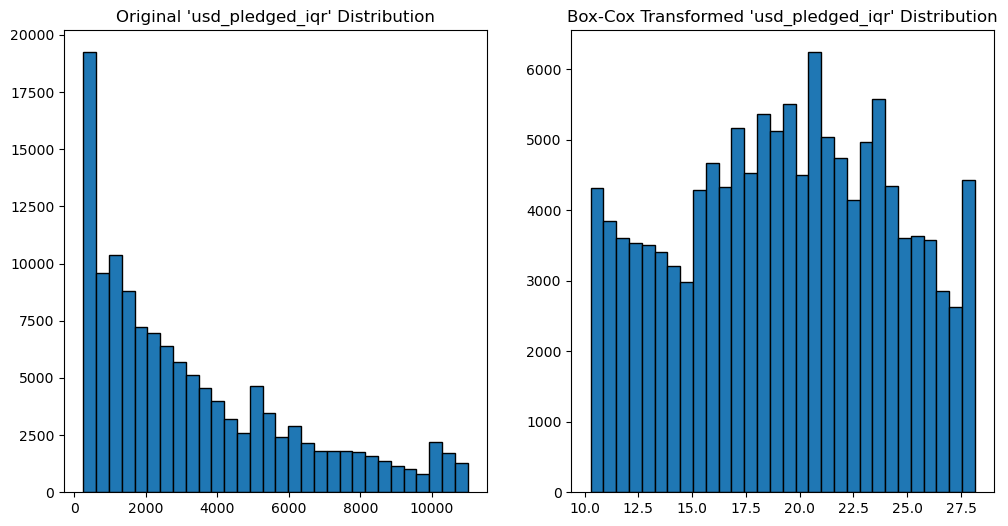

In [100]:
from scipy.stats import boxcox

# Add a small constant to handle zeros
constant = 0.01
df['usd_pledged_boxcox'], lambda_ = boxcox(df['usd_pledged_iqr'] + constant)

# Plot the original and Box-Cox transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['usd_pledged_iqr'], bins=30, edgecolor='k')
plt.title("Original 'usd_pledged_iqr' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['usd_pledged_boxcox'], bins=30, edgecolor='k')
plt.title("Box-Cox Transformed 'usd_pledged_iqr' Distribution")
plt.show()

Transformation of days-columns is not required

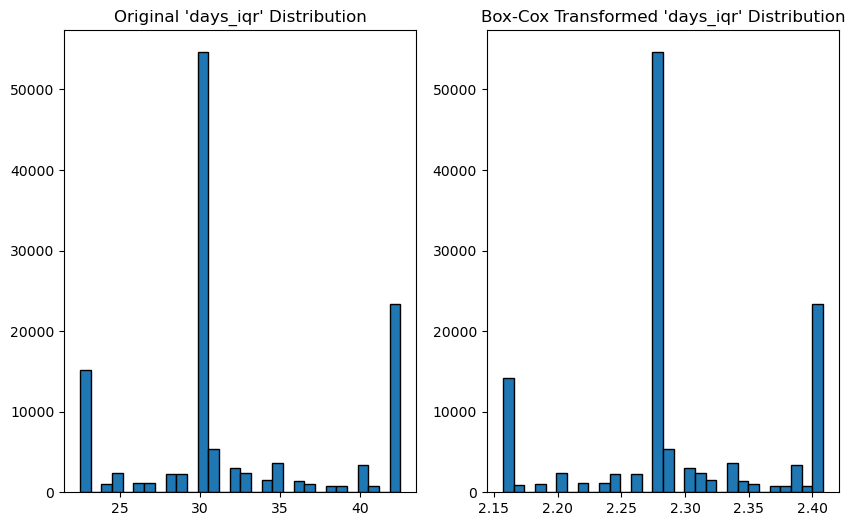

In [101]:
from scipy import stats
# Column to transform
column = 'days_iqr'
# Box-Cox Transformation
df['days_iqr_boxcox'], _ = stats.boxcox(df['days_iqr'] + 1)  # Adding 1 to avoid non-positive values

# Plot the before and after distributions
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['days_iqr'], bins=30, edgecolor='k')
plt.title(f"Original '{column}' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['days_iqr_boxcox'], bins=30, edgecolor='k')
plt.title("Box-Cox Transformed 'days_iqr' Distribution")
plt.show()

In [ ]:
Transformation of backers_winsorized column by box-cox

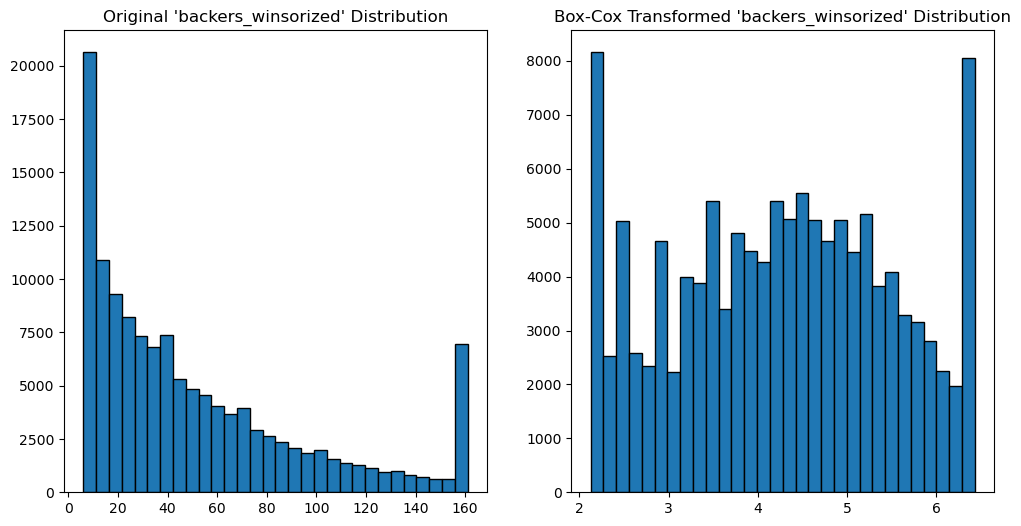

In [102]:
# Box-Cox Transformation
column = 'backers_winsorized'

df['backers_winsorized_boxcox'], lambda_boxcox = boxcox(df['backers_winsorized'] + 1)  # Adding 1 to avoid non-positive values

# Plot the before and after distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['backers_winsorized'], bins=30, edgecolor='k')
plt.title(f"Original '{column}' Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['backers_winsorized_boxcox'], bins=30, edgecolor='k')
plt.title("Box-Cox Transformed 'backers_winsorized' Distribution")
plt.show()

In [ ]:
Transformation of backer_goal_iqr by 

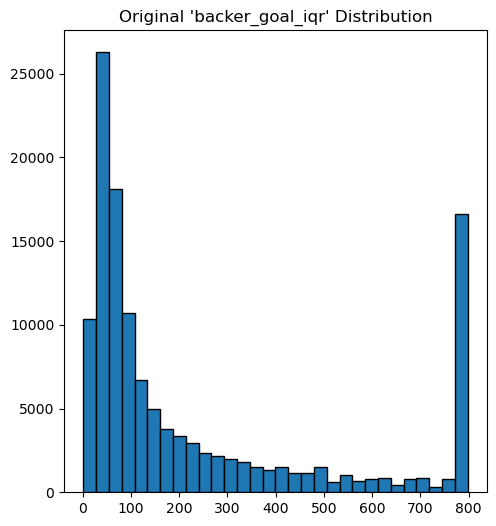

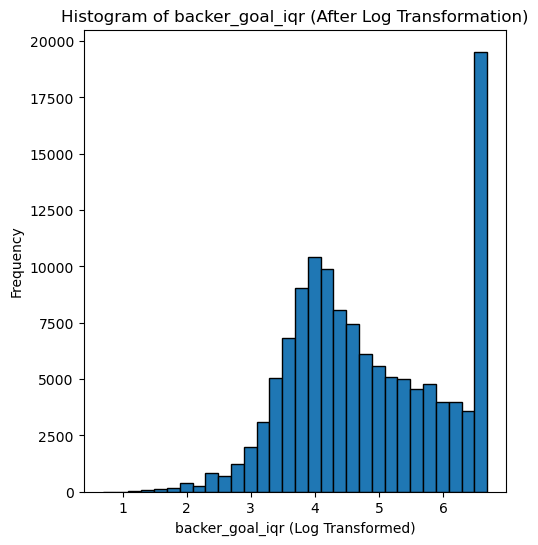

In [103]:
# Apply log transformation
df['backer_goal_iqr_log'] = df['backer_goal_iqr'].apply(lambda x: np.log1p(x))

# Plot the original and transformed distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['backer_goal_iqr'], bins=30, edgecolor='k')
plt.title("Original 'backer_goal_iqr' Distribution")


# After log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.hist(df['backer_goal_iqr_log'], bins=30, edgecolor='black')
plt.xlabel('backer_goal_iqr (Log Transformed)')
plt.ylabel('Frequency')
plt.title('Histogram of backer_goal_iqr (After Log Transformation)')
plt.grid(False)
plt.show()

In [112]:
#df.drop(columns=['backers_winsorized','usd_goal_iqr', 'usd_pledged_iqr', 'days_iqr', 'backer_goal_iqr'], inplace= True)

# Normality check

In [114]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for 'usd_goal_Box-Cox'
statistic, p_value = shapiro(df['usd_goal_Box-Cox'])

# Print the results
print("Shapiro-Wilk Test for 'usd_goal_Box-Cox':")
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the data looks approximately Gaussian (normal)
alpha = 0.05
if p_value > alpha:
    print("Normal Distribution(fail to reject H0)")
else:
    print("Non-Normal Distribution(reject H0)")

Shapiro-Wilk Test for 'usd_goal_Box-Cox':
Test Statistic: 0.9636497497558594
P-value: 0.0
Non-Normal Distribution(reject H0)


In [115]:
# Perform Shapiro-Wilk test for 'usd_pledged_boxcox'
statistic, p_value = shapiro(df['usd_pledged_boxcox'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'usd_pledged_boxcox' column is normally distributed.")
else:
    print("The 'usd_pledged_boxcox' column is not normally distributed.")

The 'usd_pledged_boxcox' column is not normally distributed.


In [116]:
# Perform Shapiro-Wilk test for 'backers_winsorized_boxcox'
statistic, p_value = shapiro(df['backers_winsorized_boxcox'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'backers_transformed' column is normally distributed.")
else:
    print("The 'backers_transformed' column is not normally distributed.")

The 'backers_transformed' column is not normally distributed.


In [117]:
# Perform Shapiro-Wilk test for 'backer_goal_iqr_log'
statistic, p_value = shapiro(df['backer_goal_iqr_log'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'backer_goal_transformed' column is normally distributed.")
else:
    print("The 'backer_goal_transformed' column is not normally distributed.")

The 'backer_goal_transformed' column is not normally distributed.


In [118]:
# Perform Shapiro-Wilk test for 'days_iqr_boxcox'
statistic, p_value = shapiro(df['days_iqr_boxcox'])

# Check if the column is normal or not
if p_value > 0.05:
    print("The 'days_iqr' column is normally distributed.")
else:
    print("The 'days_iqr' column is not normally distributed.")

The 'days_iqr' column is not normally distributed.


# Two-sampled t-test

In [119]:
from scipy.stats import ttest_ind

# Separate the 'backers' column for successful and failed projects
backers_successful = df[df['state'] == 'successful']['backers']
backers_failed = df[df['state'] == 'failed']['backers']

# Perform the t-test
t_statistic, p_value = ttest_ind(backers_successful, backers_failed, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than or equal to alpha
if p_value <= alpha:
    print("There is a significant difference in the number of backers between successful and failed projects.")
else:
    print("There is no significant difference in the number of backers between successful and failed projects.")

There is a significant difference in the number of backers between successful and failed projects.


# Statistical tests for categorical variable

In [123]:
from scipy.stats import chi2_contingency

# Chi-squared test for 'quarter'
contingency_quarter = pd.crosstab(df['quarter'], df['state'])
chi2_quarter, p_value_quarter, dof_quarter, expected_quarter = chi2_contingency(contingency_quarter)
print("Quarter - Chi-squared Test:")
print("Chi2:", chi2_quarter)
print("P-value:", p_value_quarter)

Quarter - Chi-squared Test:
Chi2: 114.90138821983722
P-value: 9.667514492836358e-25


The extremely low p-value (9.65e-45) indicates strong evidence against the null hypothesis, suggesting that there is a significant association between the 'quarter' variable and the 'state' variable. In other words, the success/failure rates of projects vary significantly across different quarters. Since the p-value is below the typical significance level of 0.05, we reject the null hypothesis of independence, and it is reasonable to conclude that there is a statistically significant relationship between the 'quarter' and 'state' variables.

In [121]:
# Chi-squared test for 'year'
contingency_year = pd.crosstab(df['year'], df['state'])
chi2_year, p_value_year, dof_year, expected_year = chi2_contingency(contingency_year)
print("Year - Chi-squared Test:")
print("Chi2:", chi2_year)
print("P-value:", p_value_year)

Year - Chi-squared Test:
Chi2: 1264.9367190891228
P-value: 8.902423576387617e-268


The p-value of 0.0 is below any reasonable significance level, such as 0.05 or 0.01. This extremely low p-value provides very strong evidence against the null hypothesis of independence, indicating that there is a significant association between the 'year' variable and the 'state' variable. In other words, the success/failure rates of projects vary significantly across different years.

In [122]:
from scipy.stats import f_oneway

# One-way ANOVA for 'Major Cat'
grouped_data_major_cat = [df[df['Major Cat'] == cat]['usd_goal_Box-Cox'] for cat in df['Major Cat'].unique()]
anova_major_cat, p_value_major_cat = f_oneway(*grouped_data_major_cat)
print("Major Cat - One-way ANOVA:")
print("F-statistic:", anova_major_cat)
print("P-value:", p_value_major_cat)

Major Cat - One-way ANOVA:
F-statistic: 855.2450967890309
P-value: 0.0


The p-value of 0.0 is below any reasonable significance level, such as 0.05 or 0.01. This extremely low p-value provides very strong evidence against the null hypothesis of no difference in 'usd_goal' across the categories of 'Major Cat'. In other words, there is a statistically significant difference in the mean 'usd_goal' among different categories of 'Major Cat'.

Given the extremely low p-value and the large F-statistic, we can confidently reject the null hypothesis and conclude that there is a statistically significant relationship between the 'Major Cat' variable and the 'usd_goal'. It indicates that the 'usd_goal' values are significantly different among the various categories of 'Major Cat'.

In [600]:
# Create a contingency table for 'Major Cat' and 'state'
contingency_table = pd.crosstab(df['Major Cat'], df['state'])

# Perform the Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Test for 'Major Cat' and 'state':")
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)

Contingency Test for 'Major Cat' and 'state':
Chi-squared statistic: 7058.391857923003
P-value: 0.0
Degrees of freedom: 5


Given the extremely low p-value and the large Chi-squared statistic, we can confidently reject the null hypothesis and conclude that there is a statistically significant relationship between the 'Major Cat' variable and the 'state' variable. It indicates that the distribution of project outcomes ('state') is not the same across the different categories of 'Major Cat'.

In [594]:
df.dtypes

currency                         category
state                            category
backers                             int64
country                          category
usd_pledged                       float64
usd_goal                          float64
days                                int64
backer_goal                         int64
year                             category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
backers_winsorized                  int64
usd_goal_iqr                      float64
usd_pledged_iqr                   float64
days_iqr                          float64
backer_goal_iqr                   float64
constant                            int64
usd_goal_Box-Cox                  float64
usd_pledged_boxcox                float64
days_iqr_boxcox                   float64
backers_winsorized_boxcox         float64
backer_goal_iqr_log               float64
dtype: object

# Scaling

# Feature Selection

In [301]:
#df_final.to_csv('df_final.csv', index=False)

In [286]:
#df_final.dtypes

currency                         category
state                            category
country                          category
year                             category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
usd_goal_transformed              float64
usd_pledged_boxcox                float64
backers_transformed               float64
backer_goal_transformed           float64
days_iqr                          float64
dtype: object

In [602]:
df1.dtypes

currency                         category
state                            category
backers                             int64
country                          category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
constant                            int64
usd_goal_Box-Cox                  float64
usd_pledged_boxcox                float64
days_iqr_boxcox                   float64
backers_winsorized_boxcox         float64
backer_goal_iqr_log               float64
dtype: object

In [603]:
import pandas as pd
import numpy as np
# Select the columns for VIF calculation
selected_columns = ['GDP per capita (currency US$)', 'usd_goal_Box-Cox', 'usd_pledged_boxcox',
                     'backer_goal_iqr_log', 'days_iqr_boxcox','backers_winsorized_boxcox']

# Replace or remove missing values
df1[selected_columns] = df1[selected_columns].replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()  # Remove rows with NaN values

# Calculate VIF for the selected columns
def calculate_vif(df, cols):
    X = df1[cols]
    vif_data = pd.DataFrame()
    vif_data['Variable'] = cols
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(df1, selected_columns)

print(vif_result)

                        Variable          VIF
0  GDP per capita (currency US$)    46.700661
1               usd_goal_Box-Cox  1062.761947
2             usd_pledged_boxcox    53.804879
3            backer_goal_iqr_log   507.749157
4                days_iqr_boxcox   143.864410
5      backers_winsorized_boxcox   242.393936


In [604]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' containing the mentioned columns
selected_columns = [
    'GDP per capita (currency US$)',
    'usd_goal_Box-Cox',
    'usd_pledged_boxcox',
    'backer_goal_iqr_log',
    'days_iqr_boxcox',
    'backers_winsorized_boxcox'
]

# Select the relevant columns from the DataFrame
data_selected = df1[selected_columns]

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

# Initialize the PCA model
pca = PCA()

# Fit PCA on the standardized data
pca.fit(data_standardized)

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio of each principal component
print("Explained variance ratio of each principal component:")
print(explained_variance_ratio)

# Transform the data to the new principal component space
data_transformed = pca.transform(data_standardized)

# Convert the transformed data back to a DataFrame
data_pca = pd.DataFrame(data_transformed, columns=[f'PC{i+1}' for i in range(data_transformed.shape[1])])

# Add the target variable (if available) back to the DataFrame
# For example, if 'target_column' is the name of your target column
# data_pca['target_column'] = data['target_column']

# Print the first few rows of the transformed DataFrame
print("Transformed Data:")
print(data_pca.head())

Explained variance ratio of each principal component:
[0.41314975 0.23140647 0.17885978 0.14204464 0.03166154 0.0028778 ]
Transformed Data:
        PC1       PC2       PC3       PC4       PC5       PC6
0 -2.026392  2.013180  0.464120  1.254418  0.329678  0.138761
1  0.150538 -2.570915  0.868939 -0.640676  0.385767  0.035010
2 -2.038814  1.565523  0.044889  1.164481 -1.331002 -0.327530
3 -1.376689 -1.260595  0.435016  0.345220  0.133066 -0.058564
4 -0.782148 -2.015990  0.009935  0.441484 -0.316358 -0.018620


In [607]:
# Copy the PCA-transformed columns to df1
df1[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = data_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
df1.head()

,currency,state,backers,country,quarter,Major Cat,GDP per capita (currency US$),constant,usd_goal_Box-Cox,usd_pledged_boxcox,days_iqr_boxcox,backers_winsorized_boxcox,backer_goal_iqr_log,PC1,PC2,PC3,PC4,PC5,PC6
0,USD,failed,15,US,3,"Film, Video & Theater",65840.0,1,11.149360,19.304592,2.408342,3.144045,6.683517,-2.026392,2.013180,0.464120,1.254418,0.329678,0.138761
1,USD,successful,16,US,4,Others,56480.0,1,7.580666,16.071384,2.156948,3.221818,4.158883,0.150538,-2.570915,0.868939,-0.640676,0.385767,0.035010
2,USD,failed,40,US,1,Others,62440.0,1,11.149360,12.253052,2.408342,4.399722,6.439350,-2.038814,1.565523,0.044889,1.164481,-1.331002,-0.327530
3,USD,failed,11,US,1,Arts & Crafts,59320.0,1,8.693492,13.654637,2.275001,2.780646,5.429346,-1.376689,-1.260595,0.435016,0.345220,0.133066,-0.058564
4,USD,failed,16,US,4,Arts & Crafts,56480.0,1,8.069692,11.777136,2.275001,3.221818,4.553877,-0.782148,-2.015990,0.009935,0.441484,-0.316358,-0.018620


In [ ]:
# Select only the numeric predictor variables for VIF calculation

numeric_columns = ['backers', 'usd_pledged', 'usd_goal', 'days', 'backer_goal',
                   'GDP per capita (currency US$)', 'backers_winsorized', 'usd_goal_iqr',
                   'usd_pledged_iqr', 'days_iqr', 'backer_goal_iqr',
                   'usd_goal_transformed', 'usd_pledged_boxcox', 'backers_transformed', 'backer_goal_transformed']

# Replace or remove missing values
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)
df = df.dropna()  # Remove rows with NaN values

# Calculate VIF for the selected numeric predictor variables
def calculate_vif(df, cols):
    X = df[cols]
    vif_data = pd.DataFrame()
    vif_data['Variable'] = cols
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = calculate_vif(df, numeric_columns)

print(vif_result)

In [610]:
#Drop the original numerical columns (if you want to use only the PCA-transformed features)
df2.drop(['GDP per capita (currency US$)', 'usd_goal_Box-Cox', 'usd_pledged_boxcox', 'days_iqr_boxcox', 'backers_winsorized_boxcox', 'backer_goal_iqr_log'], axis=1, inplace=True)

In [11]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [10]:
#Separate the target variable 'state' from the features
X = df.drop('state', axis=1)
y = df['state']

In [613]:
# Perform dummy encoding for categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

# Separate the target variable 'state' from the features
#X = df2.drop('state', axis=1)
#y = df2['state']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [620]:
# Perform one-hot encoding on the categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [13]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

X_train (102076, 20)
y_train (102076,)


In [14]:
# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_test (25520, 20)
y_test (25520,)


In [624]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model on the training data
log_reg.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test_encoded)

In [627]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Model Accuracy: 0.9969827586206896
Confusion Matrix:
[[11296    68]
 [    9 14147]]
Classification Report:
              precision    recall  f1-score   support

      failed       1.00      0.99      1.00     11364
  successful       1.00      1.00      1.00     14156

    accuracy                           1.00     25520
   macro avg       1.00      1.00      1.00     25520
weighted avg       1.00      1.00      1.00     25520



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X=df.drop('State', axis=1)
Y=df['State']
X_train,Y_train,X_test,Y_test = 

In [124]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

ValueError: could not convert string to float: '"Roshi and the Amazing Fireflies" Inspiring Children\'s Book'